# Исследовательский анализ данныx сервиса аренды самокатов GoFast


**Мы получили данные сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках.** 

**Описание данных**

Пользователи — users_go.csv

- user_id — уникальный идентификатор пользователя
- name — имя пользователя
- age — возраст
- city — город
- subscription_type — тип подписки (free, ultra)

Поeздки — rides_go.csv

- user_id — уникальный идентификатор пользователя
- distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до - - момента, как он нажал кнопку «Завершить поездку»
- date — дата совершения поездки

Подписки — subscriptions_go.csv

- subscription_type — тип подписки
- minute_price — стоимость одной минуты поездки по данной подписке
- start_ride_price — стоимость начала поездки
- subscription_fee — стоимость ежемесячного платежа

**Цель исследования: необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти:**
- Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.
- Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
- Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

**План выполнения состоит из следующих пунктов:**

1. Загрузка данных.

2. Предобработка данных.
   - Корректировка типов данных столбцов.
   - Добавление столбцов.
   - Обработка неявных дубликатов.
   - Проверка результатов предобработки данных.
   
3. Исследовательский анализ данных:
   - Частота встречаемости городов.
   - Соотношение пользователей с подпиской и без нее.
   - Возраст пользователей.
   - Расстояние, которое пользователь преодолел за одну поездку.
   - Продолжительность поездок.
*Сделаны промежуточные выводы исследовательского анализа.*

4. Объединение данных.
- Объединение данных о пользователях, поездках и подписках в один датафрейм методом merge().
- Создание двух датафреймов с пользователями, имеющими подписку и без нее, на основе общего датафрейма.
- Визуализация данных из датафреймов, разделенных на пользователей с подпиской и без.

5. Подсчёт выручки.
- Создание датафрейма, агрегированного по пользователям
- Добавление столбца в агрегированный датафрейм с помесечной выручкой по каждому пользователю

6.Проверка гипотез


## Загрузим все необходимые библиотеки:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns


#### Шаг 1. Загрузка данных

Загрузим данные и по каждому датасету изучим первоначальную информацию

In [4]:

try:
    users_go = pd.read_csv('/datasets/users_go.csv')
except:
    users_go = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

try:
    rides_go = pd.read_csv('/datasets/rides_go.csv')
except:
    rides_go = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv', parse_dates = ['date'])

try:
    subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    subscriptions_go = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')       


In [5]:
def descr (df):
    return (display(df.head(10)), df.info())

In [6]:
descr(users_go)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


(None, None)

*При изучении первоначальной информации мы видим что данные в users_go без пропусков, название колонок также соответствует.* 

In [7]:
descr(rides_go)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


(None, None)

*При изучении первоначальной информации мы видим что данные в rides_go без пропусков, название колонок также соответствует.Также при загрузке привели столбец date к типу даты pandas.*

In [8]:
descr(subscriptions_go)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


(None, None)

*При изучении первоначальной информации мы видим что данные в subscriptions_go без пропусков, название колонок также соответствует*

#### Шаг 2. Предобработка данных

In [9]:
#создадим столбец с номеров месяцев:
rides_go['number_month']= rides_go['date'].dt.month
rides_go.head()

,user_id,distance,duration,date,number_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [10]:
print('Начало периода :', rides_go['date'].min())
print('Конец периода:', rides_go['date'].max())

Начало периода : 2021-01-01 00:00:00
Конец периода: 2021-12-30 00:00:00


Проверим на наличие пропусков и дубликатов.

*При просмотре общей информации пропусков обнаружено не было. Перепроверим дополнительно а также проверим на наличие явных дубликатов*


In [11]:
def control (df):
    return  (df.isna().sum(), df.duplicated().sum())

In [12]:
control(users_go)

(user_id              0
 name                 0
 age                  0
 city                 0
 subscription_type    0
 dtype: int64,
 31)

In [13]:
#удалим дубликаты
users_go.drop_duplicates(inplace = True)
users_go.duplicated().sum()

0

In [14]:
control (rides_go)

(user_id         0
 distance        0
 duration        0
 date            0
 number_month    0
 dtype: int64,
 0)

In [15]:
control (subscriptions_go)

(subscription_type    0
 minute_price         0
 start_ride_price     0
 subscription_fee     0
 dtype: int64,
 0)

*Во втором шаге мы создали необходимый столбец обработали все три таблицы на наличие пропусков и дубликатов*

#### Шаг 3. Исследовательский анализ данных

**Опишим общую информацию о пользователях и поездках:**
- частота встречаемости городов;
- соотношение пользователей с подпиской и без подписки;
- возраст пользователей;
- расстояние, которое пользователь преодолел за одну поездку;
- продолжительность поездок.

**Частота встречаемости городов**

In [16]:
# Cгруппируем пользователей по городам
city_users = users_go.pivot_table(index ='city', values = 'user_id', aggfunc ='count').sort_values(by='user_id', ascending = False)
city_users

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


In [17]:
users_go['city'].value_counts().sort_values(ascending=False)

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

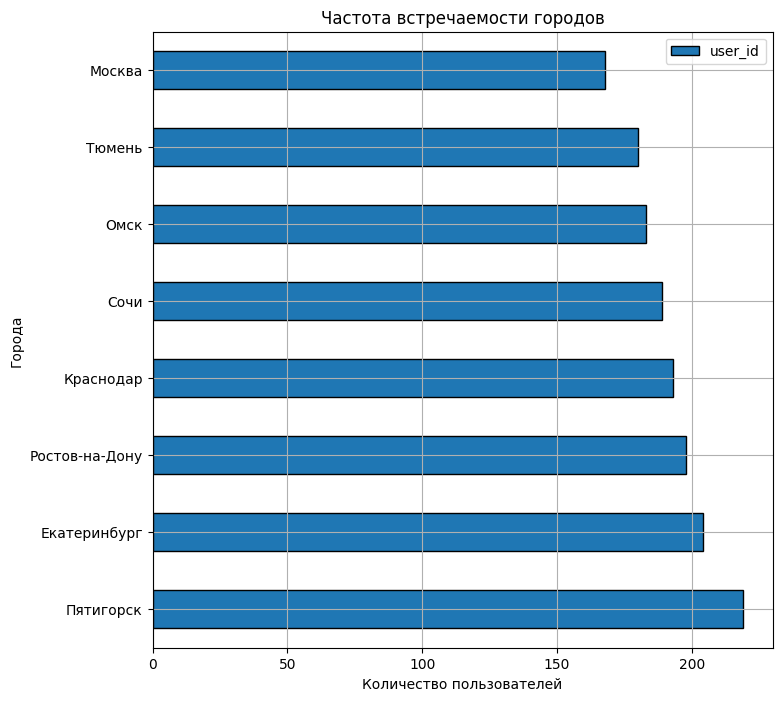

In [18]:
# для визуализации лучше всего нам подойдет гистограмма в количественоом выражении и круговая диаграмма в процентном
city_users.plot(kind='barh', figsize=(8, 8), title='Частота встречаемости городов', ec = 'black', grid=True)
plt.xlabel('Количество пользователей')
plt.ylabel('Города')
plt.show()

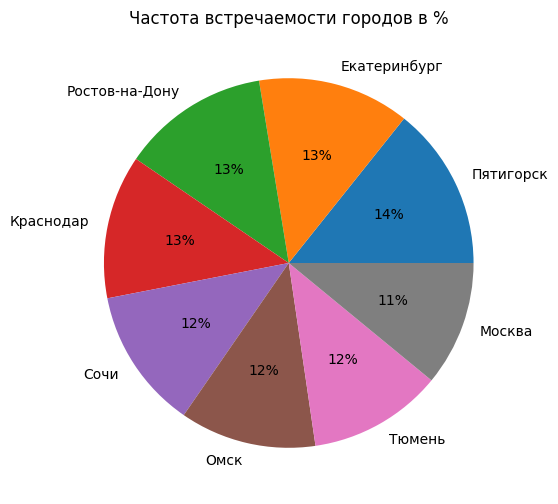

In [19]:
users_go['city'].value_counts().plot(
    kind = 'pie', y = city_users, autopct = '%1.0f%%', label='',
    figsize=(6,6), title = 'Частота встречаемости городов в %')
plt.show()

Выводы

*В процентном соотношении присутствие в различных городах распределено практически равномерно. В количественном, странным образом, Москва на последнем месте. Видимо это связано с огромной конкуренцией и меньшей представленностью сервиса в Москве* 

**Соотношение пользователей с подпиской и без подписки**

In [20]:
print(users_go['subscription_type'].value_counts())

subscription_type
free     835
ultra    699
Name: count, dtype: int64


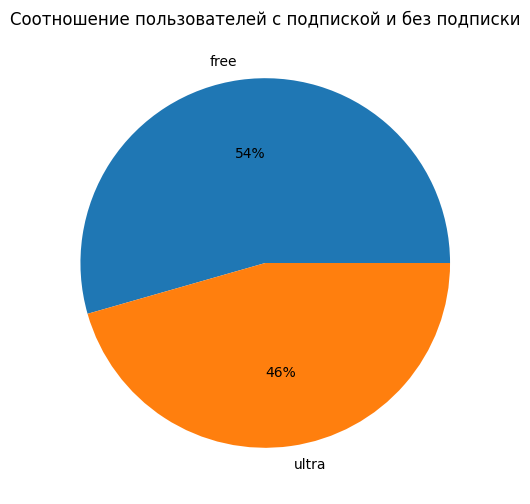

In [21]:
users_go['subscription_type'].value_counts().plot(
    kind = 'pie', autopct = '%1.0f%%', figsize=(6,6), label='',
    title = 'Cоотношение пользователей с подпиской и без подписки');
plt.show()

Выводы

*Количество пользователей с подпиской ultra составляет 46% от общего количества, что является хорошим показателем*

**Возраст пользователей**

In [22]:
print(users_go['age'].describe())
print(users_go['age'].value_counts())
users_go['age'].mode()[0]

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64
age
25    145
24    132
26    131
23    129
22    119
27    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
16     19
34     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: count, dtype: int64


25

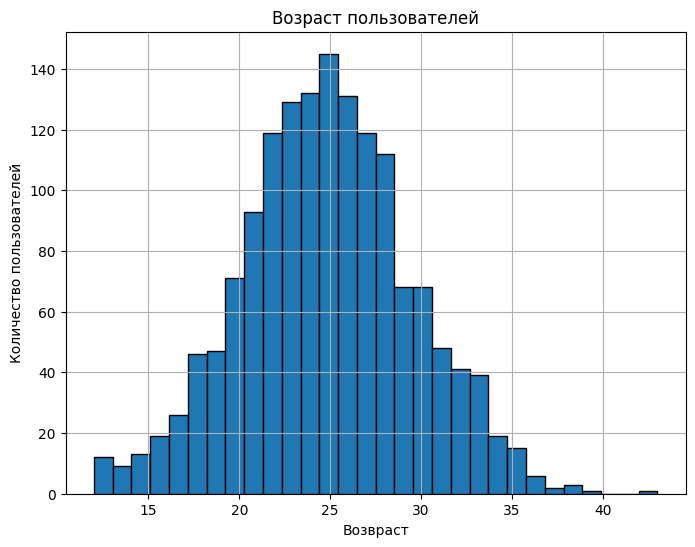

In [23]:
users_go['age'].hist( bins = 30, grid=True,ec='black', figsize = (8,6))
plt.title('Возраст пользователей')
plt.xlabel('Возвраст')
plt.ylabel('Количество пользователей')
plt.show()

Выводы

*Всего сервисом GoFast воспользовались 1534. Среднее, медиана и мода показывают нам на то,  что в основном сервисом пользуються 25-летние, минимальный возвраст 12 лет, максимальный 43*

**Расстояние, которое пользователь преодолел за одну поездку**

In [24]:
rides_go.tail(10)

,user_id,distance,duration,date,number_month
18058,1534,195.447469,6.469074,2021-06-11,6
18059,1534,3214.021065,18.343604,2021-06-18,6
18060,1534,3644.708038,20.289416,2021-08-08,8
18061,1534,3977.744996,26.916544,2021-08-20,8
18062,1534,4928.173852,22.560373,2021-09-13,9
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11
18067,1534,2371.711192,15.893917,2021-12-29,12


In [25]:
rides_go['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

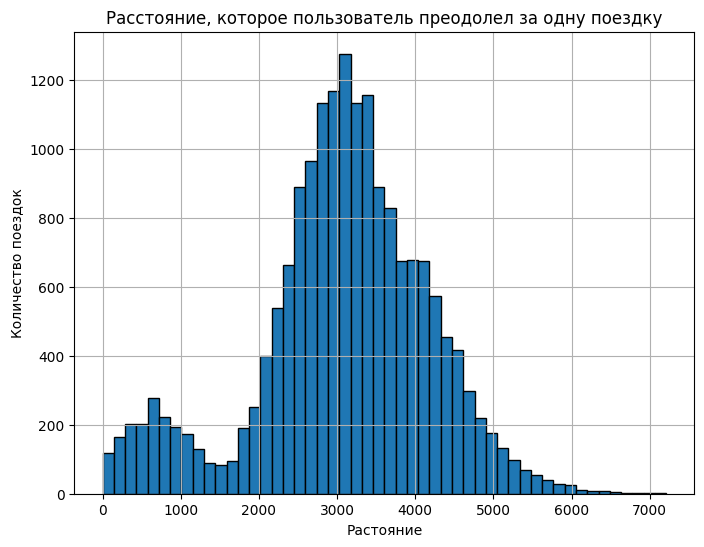

In [26]:
rides_go['distance'].hist( bins = 50, grid=True, ec='black', figsize = (8,6))
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Растояние')
plt.ylabel('Количество поездок')
plt.show()

Выводы

*Мы видим, что пользователи сервиса, в среднем за одну поездку проезжают 3000-3200 метров. Также есть значения близки к нулю, скорее всего это связано с тем, что пользователь не умеет ездить на самокате и не смог преодолеть страх поездки* 

**Продолжительность поездок**

In [27]:
rides_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

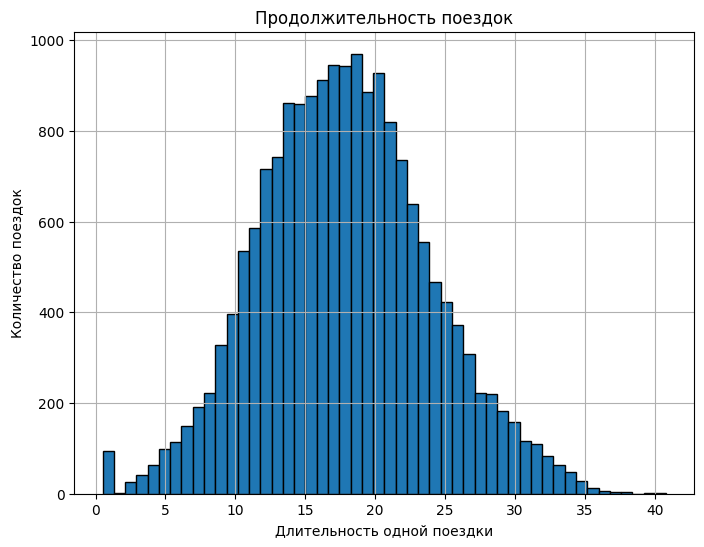

In [28]:
rides_go['duration'].hist( bins = 50, grid=True, ec='black', figsize = (8,6))
plt.title('Продолжительность поездок')
plt.xlabel('Длительность одной поездки')
plt.ylabel('Количество поездок')
plt.show()

In [29]:
rides_go['duration'].sort_values()

12013     0.500000
17314     0.500000
15029     0.500000
7437      0.500000
12967     0.500000
           ...    
6453     38.265229
1998     38.352763
2623     39.526602
4709     39.873856
4215     40.823963
Name: duration, Length: 18068, dtype: float64

Построим "ящик с усами" для определения аномалий

<function matplotlib.pyplot.show(close=None, block=None)>

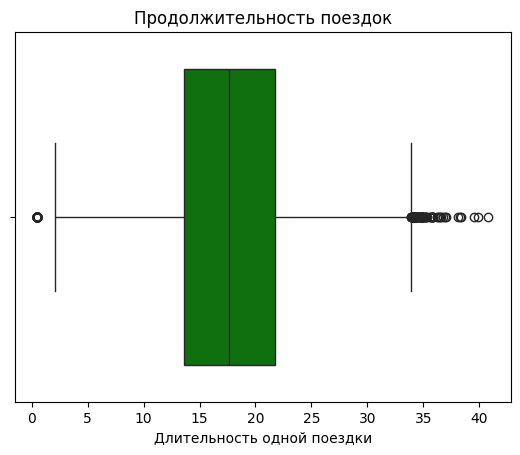

In [30]:
sns.boxplot(x=rides_go['duration'], color='green')
plt.title('Продолжительность поездок')
plt.xlabel('Длительность одной поездки')
plt.show


Выводы

*Длительность поездки составляет от 0,5 до 40 минут. Такой короткий интервал времени скорее всего (как писалось выше) связан со страхом пользователя использовать самокат. Средние как и медиана составляет почти 18 минут.*

#### Шаг 4. Объединение данных

**Объединим данные о пользователях, поездках и подписках в один датафрейм**

In [31]:
data_go = users_go.merge(rides_go, on='user_id').merge(subscriptions_go, on='subscription_type')
data_go.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,number_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [32]:
print('Количество строк в rides_go:', rides_go['user_id'].count())
print('Количество строк в data_go:', data_go['user_id'].count())
print()
print('Количество пользователей в users_go:', len(users_go['user_id'].unique()))
print('Количество пользователей в data_go:', len(data_go['user_id'].unique()))

Количество строк в rides_go: 18068
Количество строк в data_go: 18068

Количество пользователей в users_go: 1534
Количество пользователей в data_go: 1534


**Создайте ещё два датафрейма из датафрейма:**
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [33]:
#создадим датафрейм без подписки
without_subscription = data_go.query('subscription_type == "free"')
display(without_subscription.head(10))
without_subscription.describe()

,user_id,name,age,city,subscription_type,distance,duration,date,number_month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6,8,50,0


,user_id,age,distance,duration,date,number_month,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,24.893326,3045.495282,17.390909,2021-07-01 21:47:03.236514560,6.522994,8.0,50.0,0.0
min,700.000000,12.000000,0.855683,0.500000,2021-01-01 00:00:00,1.000000,8.0,50.0,0.0
25%,915.000000,22.000000,2366.562689,12.958437,2021-04-02 00:00:00,4.000000,8.0,50.0,0.0
50%,1123.000000,25.000000,3114.648465,17.326890,2021-07-01 00:00:00,7.000000,8.0,50.0,0.0
75%,1328.000000,28.000000,3905.697894,21.594071,2021-09-30 00:00:00,9.000000,8.0,50.0,0.0
max,1534.000000,43.000000,7211.007745,34.948498,2021-12-30 00:00:00,12.000000,8.0,50.0,0.0
std,241.165628,4.481100,1246.173806,6.326803,NaN,3.449770,0.0,0.0,0.0


In [34]:
#создадим датафрейм с подпиской
with_subscription = data_go.query('subscription_type == "ultra"')
display(with_subscription.head(10))
with_subscription.describe()

,user_id,name,age,city,subscription_type,distance,duration,date,number_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


,user_id,age,distance,duration,date,number_month,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,24.892615,3115.445388,18.541985,2021-06-28 21:31:34.153846016,6.422308,6.0,0.0,199.0
min,1.000000,12.000000,244.210438,3.760353,2021-01-01 00:00:00,1.000000,6.0,0.0,199.0
25%,175.000000,22.000000,2785.444017,14.524654,2021-04-01 00:00:00,4.000000,6.0,0.0,199.0
50%,351.000000,25.000000,3148.637229,18.178153,2021-06-27 00:00:00,6.000000,6.0,0.0,199.0
75%,525.000000,28.000000,3560.574425,21.884129,2021-09-25 00:00:00,9.000000,6.0,0.0,199.0
max,699.000000,38.000000,5699.769662,40.823963,2021-12-30 00:00:00,12.000000,6.0,0.0,199.0
std,201.099339,4.757208,836.895330,5.572048,NaN,3.414616,0.0,0.0,0.0


*Визуализируем информацию о расстоянии поездок для пользователей обеих категорий.*

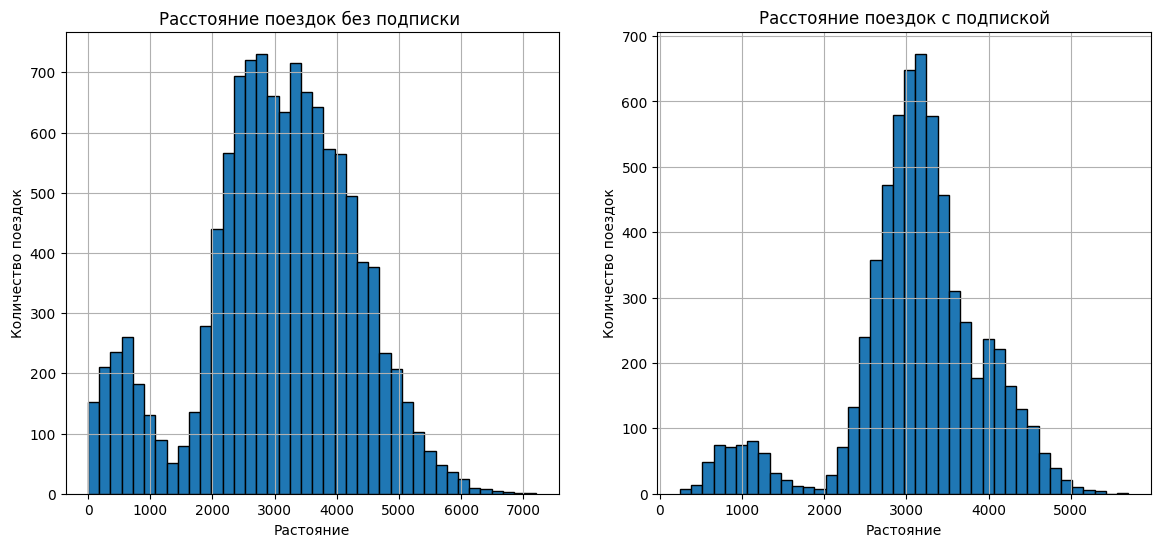

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(without_subscription['distance'], bins = 40, ec='black')
ax1.set_title('Расстояние поездок без подписки ')
ax1.grid(True)
ax1.set_xlabel('Растояние')
ax1.set_ylabel('Количество поездок')

ax2.hist(with_subscription['distance'], bins = 40,  ec='black')
ax2.set_title('Расстояние поездок с подпиской')
ax2.grid(True)
ax2.set_xlabel('Растояние')
ax2.set_ylabel('Количество поездок')

plt.show()

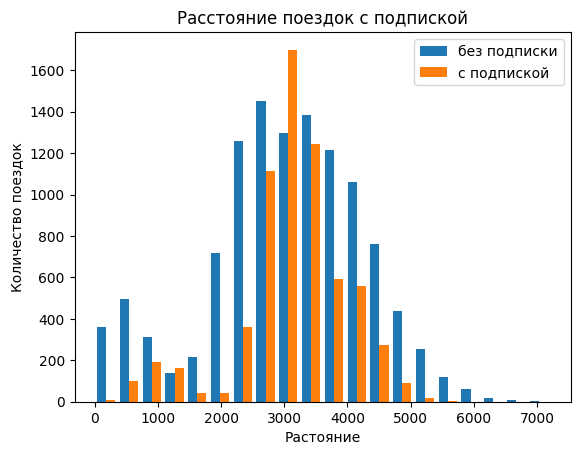

In [36]:
plt.hist([without_subscription['distance'], with_subscription['distance']],
         bins=20,
         stacked=False)
plt.title('Расстояние поездок с подпиской')
plt.xlabel('Растояние')
plt.ylabel('Количество поездок')
plt.legend(['без подписки', 'с подпиской'])
plt.show()

Выводы

*Мы видим что если сравнивая расстояние с подпиской и без, то получим следующие результаты:*
- максимальная длина поездки без подписки составляет 7210 метров , в то время как с подпиской 5699;
- чаще всего пользователи с подпиской используют самокат на дистанцию от 2500 до 4000 метров, без подписки от 2500 до 4500 метров.

*Визуализируем информацию о времени поездок для пользователей обеих категорий.*

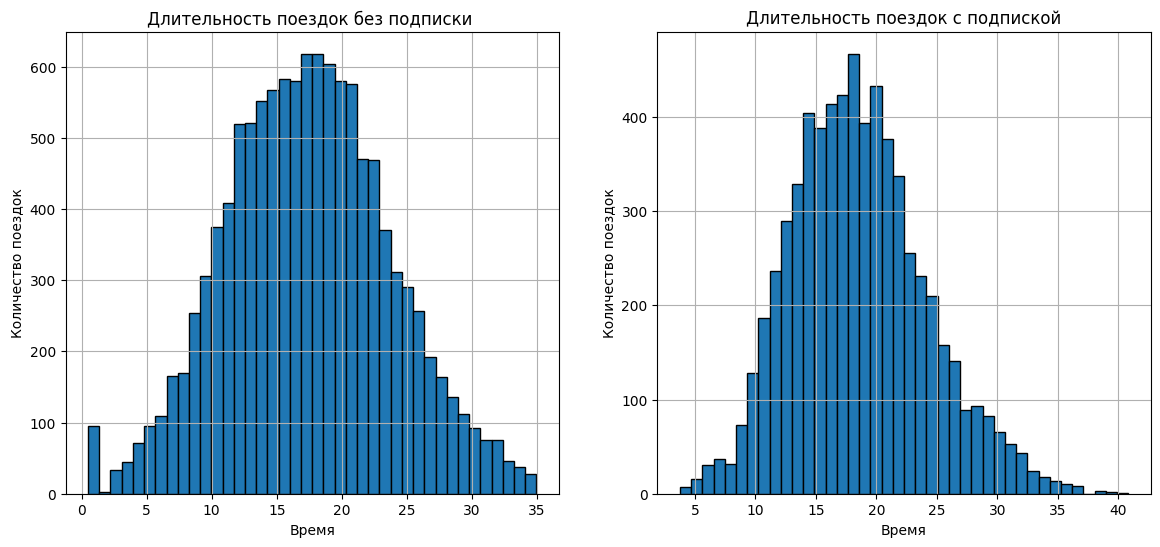

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(without_subscription['duration'], bins = 40, ec='black')
ax1.set_title('Длительность поездок без подписки ')
ax1.grid(True)
ax1.set_xlabel('Время')
ax1.set_ylabel('Количество поездок')

ax2.hist(with_subscription['duration'], bins = 40,  ec='black')
ax2.set_title('Длительность поездок с подпиской')
ax2.grid(True)
ax2.set_xlabel('Время')
ax2.set_ylabel('Количество поездок')

plt.show()

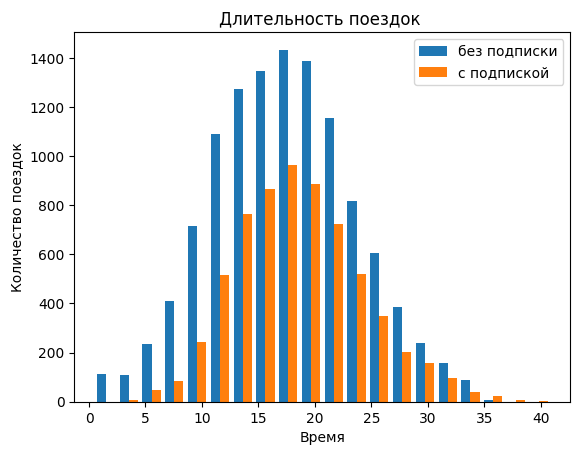

In [38]:
plt.hist([without_subscription['duration'], with_subscription['duration']],
         bins=20,
         stacked=False)
plt.title('Длительность поездок ')
plt.xlabel('Время')
plt.ylabel('Количество поездок')
plt.legend(['без подписки', 'с подпиской'])
plt.show()

Выводы

При визуализации данных с подпиской и без мы видим что среднее числовые значения и гистограмма дают разный результат: в числовом выражении среднее как у пользователей с подпиской так и без составляет 18 минут, в то время как при изучении гистограммы мы видим что основная масса пользователей без прописки катается на самокатах от 10 до 25 минут, а пользователи с подпиской от 12 до 22 минут.

#### Шаг 5. Подсчёт выручки

**Создадим датафрейм с агрегированными данными о поездках и найдём для каждого пользователя за каждый месяц:** 
- суммарное расстояние, 
- количество поездок, 
- суммарное время. 

In [39]:
#Создадим датафрейм и округлим значения
data_go['duration'] = np.ceil(data_go['duration'])
df_go = data_go.pivot_table(
                           index=['number_month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : 'count', 
                                      'subscription_type' : min})

**Добавим столбец с помесячной выручкой, которую принёс каждый пользователь.**

count    11331.000000
mean       342.303504
std        153.875346
min         58.000000
25%        234.000000
50%        319.000000
75%        415.000000
max       1444.000000
Name: revenue, dtype: float64


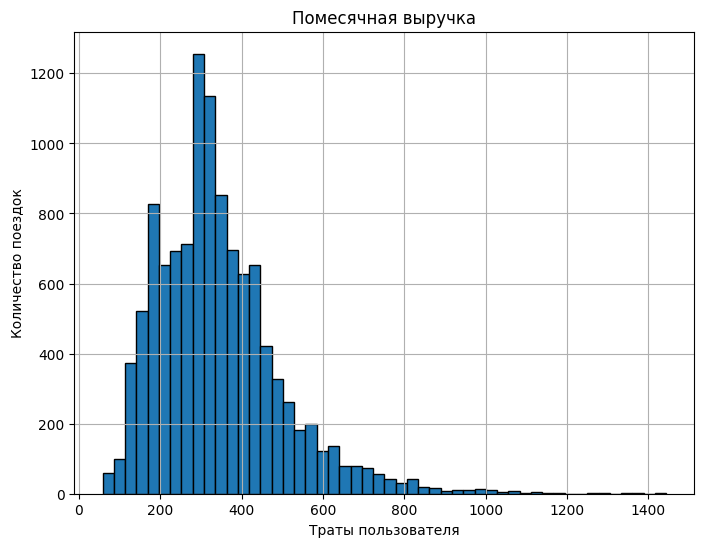

In [40]:
#создадим функцию
def month_revenue(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    if row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['name']
    
#добавим столбец    
df_go['revenue'] =  df_go.apply(month_revenue, axis=1)

print(df_go['revenue'].describe())
df_go['revenue'].hist( bins = 50, grid=True, ec='black', figsize = (8,6))
plt.title('Помесячная выручка')
plt.xlabel('Траты пользователя')
plt.ylabel('Количество поездок')
plt.show()


In [41]:
df_go1 = data_go.pivot_table(
                           index=['number_month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_fee', 'minute_price', 'start_ride_price'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : 'count', 
                                      'subscription_fee' : min,
                                      'minute_price': min, 
                                      'start_ride_price':min})
df_go1

distance  duration  minute_price  name  \
number_month user_id                                              
1            1        7027.511294      42.0             6     2   
             3        3061.777147      13.0             6     1   
             5        3914.646990      13.0             6     1   
             7        6478.080979      28.0             6     2   
             12       3577.151148      33.0             6     1   
...                           ...       ...           ...   ...   
12           1525     4597.854350      34.0             8     1   
             1526     3644.121544      23.0             8     1   
             1528     3998.569324      11.0             8     1   
             1532     6111.889853      42.0             8     2   
             1534     2371.711192      16.0             8     1   

                      start_ride_price  subscription_fee  
number_month user_id                                      
1            1                       0               199  
             3                       0               199  
             5                       0               199  
             7                       0               199  
             12                      0               199  
...                                ...               ...  
12           1525                   50                 0  
             1526                   50                 0  
             1528                   50                 0  
             1532                   50                 0  
             1534                   50                 0  

[11331 rows x 6 columns]

In [42]:
df_go1['revenue'] = (
    (df_go1['start_ride_price'] * df_go1['name']) 
    + (df_go1['minute_price'] * df_go1['duration']) 
    + df_go1['subscription_fee']
)
df_go1

distance  duration  minute_price  name  \
number_month user_id                                              
1            1        7027.511294      42.0             6     2   
             3        3061.777147      13.0             6     1   
             5        3914.646990      13.0             6     1   
             7        6478.080979      28.0             6     2   
             12       3577.151148      33.0             6     1   
...                           ...       ...           ...   ...   
12           1525     4597.854350      34.0             8     1   
             1526     3644.121544      23.0             8     1   
             1528     3998.569324      11.0             8     1   
             1532     6111.889853      42.0             8     2   
             1534     2371.711192      16.0             8     1   

                      start_ride_price  subscription_fee  revenue  
number_month user_id                                               
1            1                       0               199    451.0  
             3                       0               199    277.0  
             5                       0               199    277.0  
             7                       0               199    367.0  
             12                      0               199    397.0  
...                                ...               ...      ...  
12           1525                   50                 0    322.0  
             1526                   50                 0    234.0  
             1528                   50                 0    138.0  
             1532                   50                 0    436.0  
             1534                   50                 0    178.0  

[11331 rows x 7 columns]

In [43]:
df_go1['revenue'].describe()

count    11331.000000
mean       342.303504
std        153.875346
min         58.000000
25%        234.000000
50%        319.000000
75%        415.000000
max       1444.000000
Name: revenue, dtype: float64

Мы провели  необходимые вычисления подсчитав суммарное расстояние, количество поездок  и суммарное время. Также мы добавили новый столбец с помесячной выручкой, которую принёс каждый пользователь . Мы видим, что в не зависимости от наличия подписки или нет, в среднем 
пользователь тратит в месяц 342 рубля, хотя медиана из-за выбросов 319 рубля. Также мы видим что основная масса пользователей тратит от 200 до 415 рублей

#### Шаг 6. Проверка гипотез

**1. Проверим гипотезу: тратят ли пользователи с подпиской больше времени на поездки?**

Для этого мы проведём статистический тест, где нулевая гипотеза состоит в том, что время пользователей с подпиской равно времени пользователей без подписки, тогда альтернативная гипотеза, соответственно, будет состоять в том что время пользователей с подпиской больше времени пользователей без подписки.

In [44]:
free = without_subscription['duration']
ultra =  with_subscription['duration']
print(f'Cреднее время, которое тратят пользователи с подпиской: {ultra.mean().round()}')
print(f'Cреднее время, которое тратят пользователи без подписки: {free.mean().round()}')


#выбранный уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(ultra, free, alternative = 'greater')

# вычисляем p-value
print('p-значение:', results.pvalue)

# сделаем сравнение p-value с alpha

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Cреднее время, которое тратят пользователи с подпиской: 19.0
Cреднее время, которое тратят пользователи без подписки: 17.0
p-значение: 1.2804098316645613e-34
Отвергаем нулевую гипотезу


После проведения теста мы видим что р — значение меньше альфы поэтому нулевую гипотезу отвергаем. Среднее значение подтверждает нам, что с подпиской катаются дольше.

**2. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?**

Проведём статистический тест, где нулевая гипотеза состоит в том, что среднее расстояние пользователей с подпиской равно 3130 метров, тогда альтернативная гипотеза, соответственно, будет состоять в том что среднее расстояние пользователей с подпиской больше 3130 метров.

In [45]:
distance_ultra = with_subscription['distance']
value = 3130
print(f'Cреднее расстояние, которое проезжают пользователи с подпиской: {distance_ultra.mean().round(2)}')
#выбранный уровень статистической значимости
alpha = 0.05

results = st.ttest_1samp(distance_ultra, value, alternative='greater')

# вычисляем p-value
print('p-значение:', results.pvalue)

# сделаем сравнение p-value с alpha

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Cреднее расстояние, которое проезжают пользователи с подпиской: 3115.45
p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


После проведения теста мы видим что р — значение больше альфы поэтому нулевую гипотезу не отвергаем. Нельзя сказать что среднее расстояние пользователей с подпиской равно 3130 метров.  В тоже время в числовом выражении оно составляет 3115.45 метров, что однозначно меньше 3130 метров, это означает что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

**3. Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.**

Наша нулевая гипотеза будет звучать так:  помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки.

Тогда альтернативная гипотеза: помесячная выручка от пользователей с подпиской выше выручке от пользователей без подписки.

In [46]:
ultra_revenue = df_go.query('subscription_type == "ultra"')['revenue']
free_revenue =  df_go.query('subscription_type == "free"')['revenue']

print(f'Средняя выручка пользователей с подпиской: {ultra_revenue.mean()}')
print(f'Средняя выручка пользователей без подписки: {free_revenue.mean()}')
#выбранный уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(ultra_revenue, free_revenue, alternative = 'greater')

# вычисляем p-value
print('p-значение:', results.pvalue)

# сделаем сравнение p-value с alpha

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Средняя выручка пользователей с подпиской: 362.7921906022502
Средняя выручка пользователей без подписки: 328.6413651073845
p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


После проведения теста мы отвергаем нулевую гипотезу что выручка равна. К тому же средняя выручка пользователей с подпиской в числовом выражении выше средней выручки пользователей без подписки

4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для проверки гопотезы используем st.ttest_rel(before, after) но прежде проведём сравнение выборок на их зависимость.
В ином случае, проведём тест: st.ttest_ind(before, after, alternative=’less’). 

**Выводы**

 
  Мы получили данные сервиса аренды самокатов GoFast. На первом этапе работы провели необходимую обработку данных, а именно:
-удалили пропуски и дубликаты;
- добавили нужные столбцы;
- поменяли тип даты.

  Исследовательский анализ:
1. частота встречаемости городов, и выяснили, что   в процентном соотношении присутствие в различных городах распределено практически равномерно. В количественном, странным образом, Москва на последнем месте. Видимо это связано с огромной конкуренцией и меньшей представленностью сервиса в Москве.
2.  соотношение пользователей с подпиской и без подписки: количество пользователей с подпиской ultra составляет 46% от общего количества, что является хорошим показателем , мы видим что сервис достаточно популярен у пользователей и они с радостью оформляют подписку.
3. возраст пользователей:всего сервисом GoFast воспользовались 1534 пользователя. Среднее, медиана и мода показывают нам на то, что в основном сервисом пользуються 25-летние, минимальный возвраст 12 лет, максимальный 43.
4.  расстояние, которое пользователь преодолел за одну поездку : пользователи сервиса, в среднем за одну поездку проезжают 3000-3200 метров. Также есть значения близки к нулю, скорее всего это связано с тем, что пользователь не умеет ездить на самокате и не смог преодолеть страх поездки .
5. продолжительность поездок: длительность поездки составляет от 0,5 до 40 минут. Такой короткий интервал времени скорее всего (как писалось выше) связан со страхом пользователя использовать самокат. Средние как и медиана составляет почти 18 минут.

  Далее мы объединили наши данные и создали две дополнительных таблицы, где указали пользователей с подпиской и без, для сравнительного анализа.
Мы выяснили что: если сравниватьрасстояние с подпиской и без,  получим следующие результаты:
- максимальная длина поездки без подписки составляет 7210 метров , в то время как с подпиской 5699;
- чаще всего пользователи с подпиской используют самокат на дистанцию от 2500 до 4000 метров, без подписки от 2500 до 4500 метров.

  А при визуализации данных с подпиской и без мы видим что среднее числовые значения и гистограмма дают разный результат: в числовом выражении среднее как у пользователей с подпиской так и без составляет 18 минут, в то время как при изучении гистограммы мы видим что основная масса пользователей без прописки катается на самокатах от 10 до 25 минут, а пользователи с подпиской от 12 до 22 минут. 

  Далее мы   провели необходимые вычисления подсчитав суммарное расстояние, количество поездок и суммарное время. Также мы добавили новый столбец с помесячной выручкой, которую принёс каждый пользователь . Мы видим, что в не зависимости от наличия подписки или нет, в среднем пользователь тратит в месяц 342 рубля, хотя медиана из-за выбросов 319 рубля. Также мы видим что основная масса пользователей тратит от 200 до 415 рублей.

  Также были выдвинуты три гипотезы, получили следующие результаты:

1. тратят ли пользователи с подпиской больше времени на поездки : после проведения теста мы видим что р — значение меньше альфы поэтому нулевую гипотезу отвергаем. Среднее значение подтверждает нам, что с подпиской катаются дольше.

2. среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров: после проведения теста мы видим что р — значение больше альфы поэтому нулевую гипотезу не отвергаем. Нельзя сказать что среднее расстояние пользователей с подпиской равно 3130 метров. В тоже время в числовом выражении оно составляет 3115.45 метров, что однозначно меньше 3130 метров, это означает что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. 

3. будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки : После проведения теста мы отвергаем нулевую гипотезу что выручка равна. К тому же средняя выручка пользователей с подпиской в числовом выражении выше средней выручки пользователей без подписки.

  Окончательные итоги : 
 Компании GoFast стоит развивать свой бизнес и в иных городах. 46% пользователей с подпиской  показывает что сервис нравится клиентам. 
 Также,  стоит обратить внимание на то, что средняя выручка от клиентов с подпиской выше чем выручка от пользователей без подписки. Компании стоит принять дополнительные шаги для завлечения новых подписчиков.